# Advanced Graphing with Seaborn
## Introduction 
We will learn how to use Seaborn to create bar charts for statistical analysis.

Seaborn is a Python data visualization library that provides simple code to create elegant visualizations fot statistical exploration and insight. Seaborn is based on Matplotlib, but improves on Matplotlib in several ways:
- Seaborn provides a more visually appealing plotting style and concise syntax
- Seaborn natively understands Pandas DataFrames, making it easier to plot data directly from CSVs
- Seaborn can easily summarize Pandas DataFrames with many rows of data into aggregated charts

To recap, Pandas is a data analysis library for Python that provides easy-to-use data structures and allows you to organize and manipulate datasets so they can be visualized. To fully leverage the power of Seaborn, it is best to prepare your data using Pandas.

We will look into how Seaborn relates to Pandas and how we can transform massive datasets into easily understandable graphics.

## Import Seaborn

In [1]:
import seaborn as sns

## Using Pandas For Seaborn
We will use Seaborn to visualize a Pandas DataFrame

DataFrames contain data structured into rows and columns. DataFrames look similar to other data tables everyone is familiar with, but they are designed specifically to be used with Python.

You can create a DataFrame from a local CSV file (CSV file store data in a tabular format).

To create a DataFrame from a local CSV file you would use the syntax:
`df = pd.read_csv('file_name.csv')`

The code above creates a DataFrame saved to a variable named `df`. The data inside of the `df` DataFrame comes from the data in the local CSV file named `file_name.csv`.

Once you have prepared and organized a Pandas DataFrame with your chosen dataset, you are ready to plot with Seaborn!

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('survey.csv')

print(df.head())

   Patient ID  Gender Age Range  Response
0        3951  Female   18 - 25         3
1         889    Male   18 - 25         5
2        2115  Female   18 - 25         4
3        3314  Female   18 - 25         2
4        5407    Male   18 - 25         6


## Plotting Bars with Seaborn

Vefire we plot the data, take a minute to understand the context behind that data. We look in to an example below:

Suppose we are analyzing data from a survey: we asked 1,000 patients at a hopistal how satisfied they were with their experience. Their response was measured on a scale of 1 - 10, with 1 being extremely unsatisfied, and 10 being extremely satisfied. We have summarized that data in a CSV file called **results.csv**.

To plot this data using Matplotlib, we would use the following code:

       Gender  Mean Satisfaction
0        Male                7.2
1      Female                8.1
2  Non-binary                6.8


Text(0, 0.5, 'Mean Satisfaction')

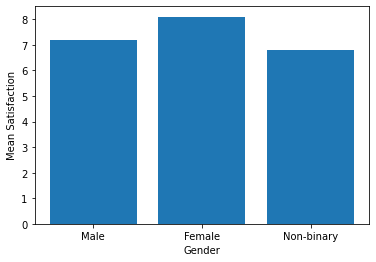

In [4]:
df = pd.read_csv('results.csv')
ax = plt.subplot()

print(df)

plt.bar(range(len(df)), df["Mean Satisfaction"])

ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.Gender)
plt.xlabel('Gender')
plt.ylabel('Mean Satisfaction')

That's alot of work for a simple bar chart! Seaborn gives us a much simpler option. With Seaborn, we can use the `sns.barplot()` command to do the same thing.

The Seaborn function `sns.barplot()`, takes at least three keyword arguments:
- `data`: a Pandas DataFrame that contains the data (in this example, `data = df`
- `x` : a string that tells Seaborn which column in the DataFrame contains other x-lables (in this case, `x="Gender"`)
- `y` : a string that tells Seaborn which column in the DataFrame contains the heights we want to plot for each bar (in this case `y = "Mean Satisfaction"`)

By default, Seaborn will aggregate and plot the *mean* of each category. 

       Gender  Mean Satisfaction
0        Male                7.2
1      Female                8.1
2  Non-binary                6.8


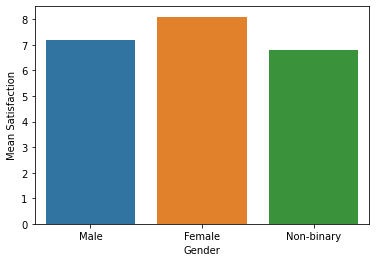

In [6]:
df = pd.read_csv('results.csv')
print(df)
sns.barplot(
    data = df,
    x = 'Gender',
    y = 'Mean Satisfaction'
)
plt.show()

## Understanding Aggregates

Seaborn can also calculate *aggregate statistics* for large datasets. To understand why this helpful, we must first understand what an *aggregate* is.

An aggregate statistic, or **aggregate**, is a single number used to describe a set of data. One example of an aggregate is the average, or *mean* of a data set. There are many other aggregate statistics as well. 

Some types of aggregate satistics include:
- Mean
- Median
- Mode
- Standard Deviation

In Python, we can compute aggregates quickly and easily using NumPy, a popular Python library for computing. 

In [8]:
import numpy as np

gradebook = pd.read_csv('gradebook.csv')
print(gradebook)

  student assignment_name  grade
0     Amy    Assignment 1     75
1     Amy    Assignment 2     82
2     Bob    Assignment 1     99
3     Bob    Assignment 2     90
4   Chris    Assignment 1     72
5   Chris    Assignment 2     66
6     Dan    Assignment 1     88
7     Dan    Assignment 2     82
8   Ellie    Assignment 1     91
9   Ellie    Assignment 2     85


In [9]:
assignment1 = gradebook[gradebook.assignment_name == 'Assignment 1']
print(assignment1)

  student assignment_name  grade
0     Amy    Assignment 1     75
2     Bob    Assignment 1     99
4   Chris    Assignment 1     72
6     Dan    Assignment 1     88
8   Ellie    Assignment 1     91


In [10]:
as1_median = np.median(assignment1.grade)
print(as1_median)

88.0


## Plotting Aggregates
Suppose the data is stored in a Pandas DataFrame called `df`. 

We can use the same Seaborn command to plot data as a bar plot: `sns.barplot(data=df, x='student', y='grade')`

This will automatically aggregate the data. Seaborn will aggregate grades by `students`, and plot the average `grade` for each student.

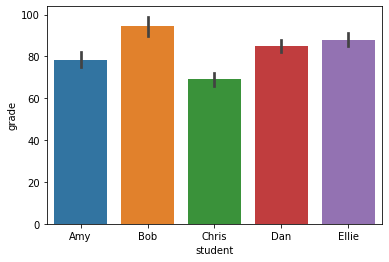

In [14]:
sns.barplot(data = gradebook, x = 'student', y = 'grade') # in this case the average of both assignments is taken for 
plt.show()                                               # all students to display with x = student

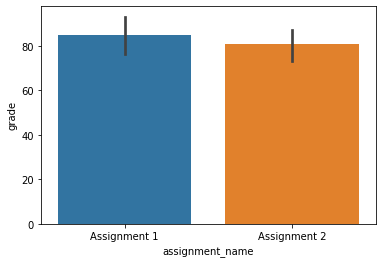

In [16]:
sns.barplot(data = gradebook, x = 'assignment_name', y = 'grade') # in this case the average of both the assignment is
plt.show()                                                       # is displayed for across all students

## Modifying Error Bars
By default, Seaborn will place *error bars* on each bar when you use the `barplot()` function.

Error bar as we can see in the example above is the small line that extend above and below the top of each bar. Errors bars visually indicate the range of values that might be expected for that bar.

In the above example, an error bar might indicate what grade we expect an average student to receive on this assignment.

By default, Seaborn uses something called **bootstrapped confidence interval**. Roughly speaking, this interval means that "*based on this data, 95% of similar situations would have an outcome within this range*".

In our gradebook example (above), the confidence interval for the assignments means "if we gave this assignment to many, many students, we're confident that the mean score on the assignment would be within the range represented by the error bar".

If you're calculating a mean and would prefer to use standard deviation for your error bars, you can pass in the keyword argument `ci = "sd"` to `sns.barplot()` which will represent one standard deviation. It would look like this:
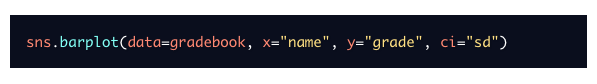

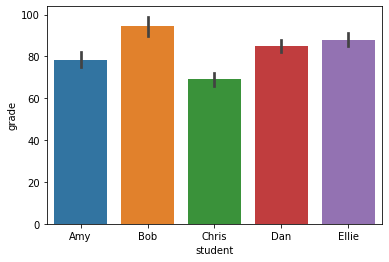

In [19]:
sns.barplot(data=gradebook, x='student', y='grade', ci='sd')
plt.show()

## Calculating Different Aggregates
In most cases, we'll want to plot the mean of our data, but sometimes we'll want something different:
- If our data hase many outlier, we may want to plot the *median*
- If our data is categorical, we might want to count how many times each category appears (such as in cases of survey responses)

To do so in Seaborn, we need to use the keyword argument `estimator`, which accepts any function that works on a list.

For example, to calculate the medican, you can pass in `np.median` to the `estimator` keyword:
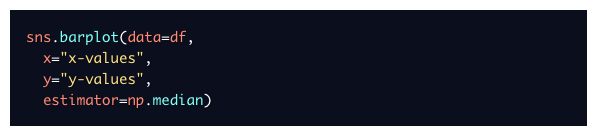

In [21]:
df = pd.read_csv('survey_hospital.csv')
print(df.head())

   Patient ID  Gender Age Range  Response
0        5031    Male   18 - 25         6
1        4618  Female   18 - 25         4
2        9074    Male   18 - 25         2
3        2742    Male   18 - 25         4
4        4004    Male   18 - 25         5


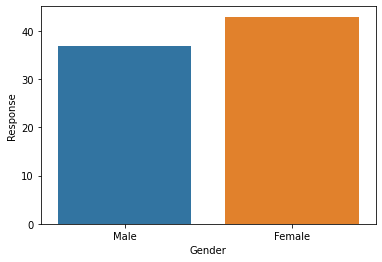

In [24]:
sns.barplot(data=df, x='Gender', y='Response', estimator=len)
plt.show()        

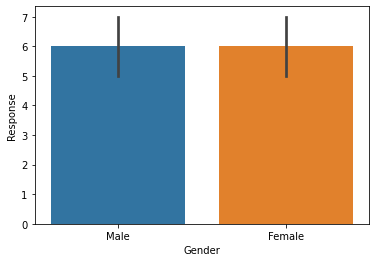

In [28]:
sns.barplot(data=df, x='Gender', y='Response', estimator=np.median)
plt.show()

## Aggregating by Multiple Columns
Sometimes we'll want to aggregate our data by multiple columns to visualize nested categorical variables. 

For example, consider our hospital survey data. The mean satisfaction seems to depend on `Gender`, but might also depend on another column: `Age Range`

We can compare both the `Gender` and `Age Range` factors at once by using the keyword `hue`
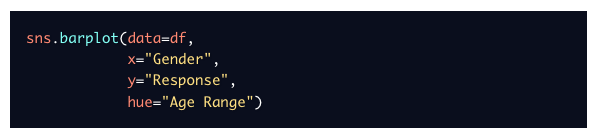
The `hue` parameter adds a nester categorical variable to the plot

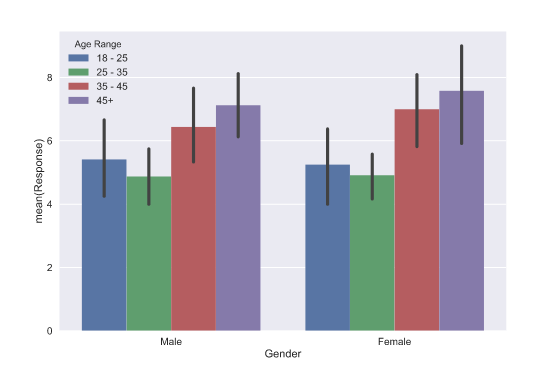
*Visualizing survey results by gender with age range nested*
In the barchart above we keep the same x-labels, but we now have different color bars representing each `Age Range`. 

We can compare two bars of the same color to see how patients with the same `Age Range`, but different `Gender` rated the survey.

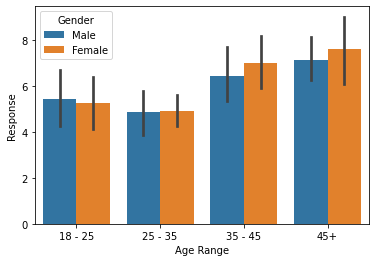

In [37]:
sns.barplot(data=df, x='Age Range', y='Response', hue='Gender')
plt.show()

### Example

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('survey_01.csv')
print(df.head())

   Patient ID  Gender  Response     Age Range
0        1360    Male         7   65 and Over
1        5255    Male         6   65 and Over
2        3224  Female         7   65 and Over
3        8907  Female         8   65 and Over
4        1425  Female         6   65 and Over


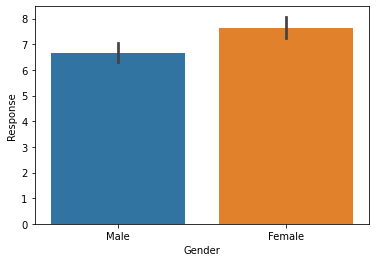

In [51]:
sns.barplot(data = df, x = 'Gender', y = 'Response')
plt.show()

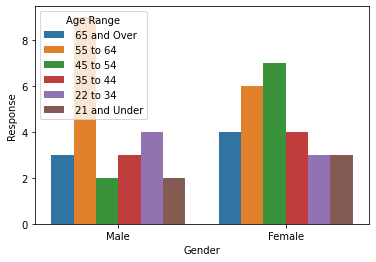

In [48]:
sns.barplot(data=df, x='Gender', y='Response', estimator=len, hue='Age Range')
# plt.figure(figsize=(15,15))
plt.show()

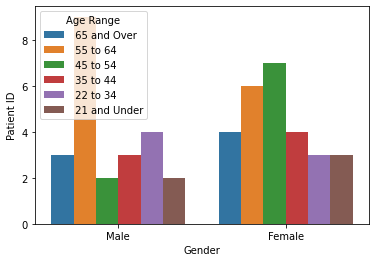

In [53]:
sns.barplot(data = df, x = 'Gender', y = 'Patient ID', hue = 'Age Range', estimator=len)
plt.show()